In [70]:
%%time
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from itertools import chain


# read dataset

def read_data(path, limiter):
    """
    Args:
        path: path to dataset in jsonl file format
        limiter: number of rows

    Returns:
        data: json dict, where every line is one sample as json
    """
    with open(path) as file:
        data = [json.loads(next(file)) for x in range(limiter)]
    return data


def transform_dict(json_dict, prefix):
    """
    Args:
        json_dict: json dict with nested key-value, where value is list
         prefix: prefix column

    Returns:
        functions_dict: dict with value as a key and default value True
    """
    result_dict = {}
    for key in json_dict.keys():
        keys = json_dict[key]
        values_with_default = {prefix + key.lower() + "-" + f_name: True for f_name in keys}
        result_dict.update(values_with_default)
    return result_dict


def transform_list(json_list, prefix):
    """
    Args:
        json_list: json list of values
        prefix: prefix column

    Returns:
        functions_dict: dict with all dll functions name with value True
    """
    result_dict = {}
    result_dict.update({prefix + i: True for i in json_list})
    return result_dict

# 1. read datas
data_path = 'C:/Users/zyche/Downloads/sample_data_6k.jsonl'
data = read_data(data_path, limiter=2000)

df = pd.DataFrame(data)

flatten_dataset = []
for sample in data:
    transformed = {}
    transformed.update({"label" : sample['label']})
    transformed.update(transform_dict(sample['imports'], 'imports.'))
    transformed.update(transform_list(sample['exports'], 'exports.'))
    
    # here we fill with transform data
    flatten_dataset.append(transformed)

# change all transformed dataset to dataframe object
flatten_df = pd.DataFrame(flatten_dataset)

Wall time: 1min 31s


In [71]:
# how many empty exports in all set

empty_exports = df[~df.exports.astype(bool)].exports.count()

empty_exports_count = df[df['exports'].map(lambda d: len(d)) == 0].exports.count()

empty_count_percent = (empty_exports_count / df.exports.size) * 100

print("There is %2f %% of empty exports" % empty_count_percent)



There is 80.800000 % of empty exports


In [72]:
# how many empty imports in all set

empty_imports = df[~df.imports.astype(bool)].imports.count()

empty_imports_count = df[df['imports'].map(lambda d: len(d)) == 0].imports.count()

empty_imports_count_percent = (empty_imports_count / df.imports.size) * 100

print("There is %2f %% of empty imports" % empty_imports_count_percent)


There is 10.000000 % of empty imports


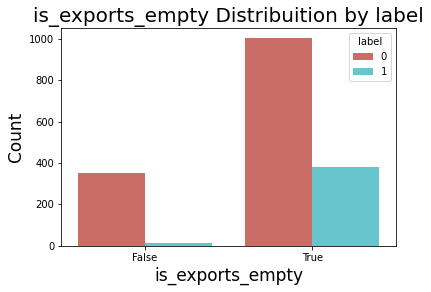

In [74]:
# not empty exports by label

label_exports_df = df[['label', 'exports']]
label_exports_df = label_exports_df[label_exports_df.label != -1]
label_exports_df['exports'] = label_exports_df['exports'].map(lambda a: len(a) == 0)

sns.countplot(x="exports", data=label_exports_df, hue="label",palette="hls")
plt.title('is_exports_empty Distribuition by label', fontsize=20)
plt.xlabel('is_exports_empty',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()


In [75]:
%%time
# check exports in groups 

label_exports_df = df[['label', 'exports']]
label_exports_malware = label_exports_df[label_exports_df.label == 1]
label_exports_bening = label_exports_df[label_exports_df.label == 0]


exports_all_malware = list(chain(*label_exports_malware.exports))
exports_all_bening = list(chain(*label_exports_bening.exports))
only_in_malware = list(set(exports_all_malware) - set(exports_all_bening))
only_in_bening_ware = list(set(exports_all_bening) - set(exports_all_malware))

# exports only in beningware
only_in_bening_ware[0:50]

Wall time: 160 ms


['??Y?$basic_string@_WU?$char_traits@_W@std@@V?$allocator@_W@2@@std@@QAEAAV01@_W@Z',
 '_ZNK8QSvgNode17transformedBoundsEv',
 '??0CanvasVHLRDataClear@@QAE@PAVCanvas@@@Z',
 '??0SortGroupFilterOptionsImpl@@QAE@XZ',
 'OCSP_REQUEST_free',
 '??_FDBDrawingInfo@@QAEXXZ',
 '?getRegisteredIterationsToBeCovered@ElemIterRegistry@@SAABV?$Arr@VCodeReference@@@@XZ',
 '?_Osfx@?$basic_ostream@_WU?$char_traits@_W@std@@@std@@QEAAXXZ',
 '??2ParamValueSetDouble@@SAPAXIABVWithFill@@@Z',
 '?getParamElementId@Element@@UBE?AW4Err@@VElementId@@PAV3@@Z',
 '?OnDeleteScale@ModelPensDlg@@IAEXXZ',
 '?getGRepAccessTypePtr@ADocument@@AAEPAW4GRepAccessType@@XZ',
 '?extend@?$Arr@U?$pair@IV?$Map@VElementId@@IU?$less@VElementId@@@std@@V?$tnallc@I@@@crs@@@std@@@@QAEPAU?$pair@IV?$Map@VElementId@@IU?$less@VElementId@@@std@@V?$tnallc@I@@@crs@@@std@@HH@Z',
 '?get_compressed_data_memory@kdu_codestream@@QAEHXZ',
 'd2i_PKCS7_SIGNER_INFO',
 '??0ComboChoiceList@@QAE@XZ',
 'DriverCallback',
 '?TURM_VoiceMailNotify_Free@@YAXPEAUTURM_

In [76]:
# exports only in beningware

only_in_malware[0:50]

['?Reset@CIPCEvent@@QAEKXZ',
 '?DestroyName@CIPCObj@@AAEXPAD@Z',
 '??_7CIPCObj@@6B@',
 '?Wait@CIPCEvent@@QAEJK@Z',
 'StopWinHook',
 '??0CEventComposite@@QAE@XZ',
 'ggtl_dll',
 '??BCSecurity@@QAEPAU_SECURITY_ATTRIBUTES@@XZ',
 '??0CDeviceModel@@QAE@ABV0@@Z',
 '??_C@_0CD@GBB@CEventComposite?5is?5busy?5ins?5Set?$CI@',
 '?GetInstallerFileList@CFactory@@QBEABV?$list@V?$basic_string@DUcase_insensitive_char_traits@@V?$allocator@D@std@@@std@@V?$allocator@V?$basic_string@DUcase_insensitive_char_traits@@V?$allocator@D@std@@@std@@@2@@std@@XZ',
 '?Has1394@CPrinter@@QBEIXZ',
 'InitializeDLL',
 '?GetATemporalPortRef@CPrinter@@QBEABVCPort@@XZ',
 'InstallDWK',
 '?IsDirectConnect@CPort@@QBEIXZ',
 '??BCThread@@QBEQAXXZ',
 '??0CIPCEvent@@QAE@ABV0@@Z',
 '?SetEvent@@YAHAAVCIPCEvent@@@Z',
 '?Set@CIPCEvent@@UAEII@Z',
 '?HasLPT@CPrinter@@QBEIXZ',
 '??0CIPCEvent@@QAE@XZ',
 '??_7CDeviceModel@@6B@',
 '?Is98Gold@@YAIXZ',
 '?HasCard@CDeviceModel@@QBEIXZ',
 '?GetDriverName@CDeviceModel@@QBEPBDXZ',
 '?IsFakeIO@CPort@

In [77]:
%%time
# frequncy imports functions for beningwares
label_imports_df = flatten_df.filter(regex='label|imports.')

bening_ware = label_imports_df[label_imports_df['label'] == 0]
bening_ware_function_df = bening_ware.loc[:, bening_ware.columns != 'label']

bening_ware_function_df.count().reset_index().rename(columns={'index': 'function', 0: 'count'})

df_counts_bening_fun = bening_ware_function_df.count() \
    .reset_index()  \
    .rename(columns={'index': 'function', 0: 'count'}) \
    .sort_values(by=['count'], ascending=False) \
    .head(50)

df_counts_bening_fun

Wall time: 13.5 s


,function,count
53,imports.kernel32.dll-GetProcAddress,667
9,imports.kernel32.dll-GetLastError,653
51,imports.kernel32.dll-GetModuleHandleA,618
17,imports.kernel32.dll-GetCurrentProcess,611
22,imports.kernel32.dll-CloseHandle,608
52,imports.kernel32.dll-LoadLibraryA,604
55,imports.kernel32.dll-MultiByteToWideChar,553
15,imports.kernel32.dll-GetModuleFileNameA,547
59,imports.kernel32.dll-WriteFile,543
389,imports.kernel32.dll-GetCurrentThreadId,541


In [78]:
%%time
# frequncy import functions for malwares

label_imports_df = flatten_df.filter(regex='label|imports.')

malwares = flatten_df[label_imports_df['label'] == 1]
malware_function_df = malwares.loc[:, malwares.columns != 'label']
malware_function_df.count().reset_index().rename(
    columns={'index': 'function', 0: 'count'})

malware_count_function_df = malware_function_df.count() \
    .reset_index() \
    .rename(columns={'index': 'function', 0: 'count'}) \
    .sort_values(by=['count'], ascending=False) \
    .head(50)

malware_count_function_df

Wall time: 5.18 s


,function,count
53,imports.kernel32.dll-GetProcAddress,201
12,imports.kernel32.dll-Sleep,197
16,imports.kernel32.dll-ExitProcess,194
22,imports.kernel32.dll-CloseHandle,189
17,imports.kernel32.dll-GetCurrentProcess,188
59,imports.kernel32.dll-WriteFile,187
9,imports.kernel32.dll-GetLastError,187
52,imports.kernel32.dll-LoadLibraryA,182
435,imports.kernel32.dll-DeleteCriticalSection,176
55,imports.kernel32.dll-MultiByteToWideChar,171


In [79]:
%%time
# chi2 for imports in malware

label_imports_malware_df = flatten_df.filter(regex='label|imports.')
label_imports_malware_df = label_imports_malware_df.fillna(False)
num_feats=30
y = label_imports_malware_df['label'] == 1
X = label_imports_malware_df.copy()
del X['label']

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

# https://medium.com/mrx-007/basic-static-analysis-of-malware-and-common-dll-ef9455d49968

30 selected features
['imports.advapi32.dll-ConvertStringSecurityDescriptorToSecurityDescriptorA', 'imports.advapi32.dll-CryptAcquireContextW', 'imports.kernel32.dll-GetEnvironmentVariableW', 'imports.kernel32.dll-WaitForSingleObjectEx', 'imports.kernel32.dll-LoadLibraryExW', 'imports.version.dll-VerQueryValueW', 'imports.kernel32.dll-OutputDebugStringW', 'imports.kernel32.dll-GetStartupInfoW', 'imports.shlwapi.dll-UrlEscapeW', 'imports.shlwapi.dll-UrlUnescapeW', 'imports.shell32.dll-SHGetFolderPathW', 'imports.kernel32.dll-IsValidLocale', 'imports.kernel32.dll-IsProcessorFeaturePresent', 'imports.user32.dll-CreateAcceleratorTableW', 'imports.kernel32.dll-ReadConsoleW', 'imports.kernel32.dll-SetFilePointerEx', 'imports.advapi32.dll-GetSecurityDescriptorSacl', 'imports.advapi32.dll-SetSecurityDescriptorSacl', 'imports.kernel32.dll-GetModuleHandleExW', 'imports.user32.dll-InternalGetWindowText', 'imports.kernel32.dll-Module32FirstW', 'imports.user32.dll-DestroyAcceleratorTable', 'imports

In [83]:
%%time
#chi2 for exports in malware

# no of maximum features we need to select

label_exports_malware_df = flatten_df.filter(regex='label|exports.')
label_exports_malware_df = label_exports_malware_df.fillna(False)

num_feats=30 # no of maximum features we need to select
y = label_exports_malware_df['label'] == 1
X = label_exports_malware_df.copy()
del X['label']


X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

30 selected features
['exports.DllCanUnloadNow', 'exports.DllGetClassObject', 'exports.DllRegisterServer', 'exports.DllUnregisterServer', 'exports.DllMain', 'exports.PlayGame', 'exports.?SetEvent@@YAHAAVCIPCEvent@@@Z', 'exports.?SetPrinterInfo@CPrinter@@QAEIPAXI@Z', 'exports.?ShowWarningMsg@CPrinter@@SAIPAD0I@Z', 'exports.?SupportsDOT4@CDeviceModel@@QBE?AW4EDot4Support@@XZ', 'exports.?SupportsDOT4@CPrinter@@QBE?AW4EDot4Support@@XZ', 'exports.?UnRegister@CEventComposite@@AAEXAAVCIPCEvent@@@Z', 'exports.?UnRegister@CIPCEvent@@QAEXAAVCEventComposite@@@Z', 'exports.?Wait@CEventComposite@@QAEJK@Z', 'exports.?Wait@CIPCEvent@@QAEJK@Z', 'exports.?Wait@CMutex@@QAEJK@Z', 'exports.?Wait@CThread@@QAEJK@Z', 'exports.?WaitForSingleObject@@YAKAAVCIPCEvent@@K@Z', 'exports.?Yield@CThread@@QAEXXZ', 'exports.SetProcessList', 'exports.StartWinHook', 'exports.StopWinHook', 'exports.vaberatg', 'exports.bageiopl', 'exports.COMPONENT.KEY', 'exports.AuthenticateLicense', 'exports.InitializeDLL', 'exports.WSPSt

In [84]:
%%time
#imports only in bening
from ast import literal_eval
from itertools import chain

df_imports = df[['label', 'imports']]
malware_imports_df = df_imports[df_imports.label == 1]
malware_imports_df = malware_imports_df['imports'].map(lambda x: [i for i in x.values()])


malware_imports_functions = list(chain(*malware_imports_df))
malware_imports_functions = list(chain(*malware_imports_functions))

bening_imports_df = df_imports[df_imports.label == 0]
bening_imports_df = bening_imports_df['imports'].map(lambda x: [i for i in x.values()])

bening_imports_functions = list(chain(*bening_imports_df))
bening_imports_functions = list(chain(*bening_imports_functions))
bening_imports_functions

diff_only_in_bening = set(bening_imports_functions) - set(malware_imports_functions)
diff_only_in_bening

Wall time: 52 ms


{'??Y?$basic_string@_WU?$char_traits@_W@std@@V?$allocator@_W@2@@std@@QAEAAV01@_W@Z',
 '_IS3DrawTransparentRGB',
 '?GXDeval@CGXDrawingAndFormatting@@UAEHPBDPANPAI2@Z',
 '??0ResourceScope@@QAE@ABVResourceSelector@@PB_W@Z',
 'ordinal11853',
 'ordinal1289',
 '?Send@Mailer@@QAEHHPAD0HH@Z',
 '?GetCellRange@CGridCtrl@@QBE?AVCCellRange@@XZ',
 'ordinal14619',
 'ordinal798',
 'ordinal4299',
 '?AdjustPath@CPageElement@@UAE?AVCStringEx@@PBD@Z',
 '?Detach@CBkrList@@QAEHPAVCBkrObject@@@Z',
 'PR_sscanf',
 '?InitEntry@SvTreeListBox@@MAEXPAVSvLBoxEntry@@ABVString@@ABVImage@@2W4SvLBoxButtonKind@@@Z',
 '_ZN16QXmlStreamReader8readNextEv',
 'DELETENOQTYLOCITEMS@F',
 'ordinal2183',
 '?getFile@CompressFile@@QAEPAVCFile@@XZ',
 'ordinal2141',
 '?AddField@XPFIELDLIST@@QAEHGGKEEH@Z',
 '_gcvt_s',
 '?Paint@TextView@@QAEXABVRectangle@@@Z',
 '??0CXObject@@QAE@PAD@Z',
 '?getLastTag@Pick@@QBEHXZ',
 '??0CGCDadosFilial@@QAE@XZ',
 'ordinal6043',
 'ExDeleteResourceLite',
 '?setMirrorTrf@@YAXABVPlane@@PAVTrf@@@Z',
 '_HUGE'

In [86]:
%%time
# imports only in malware
diff_only_in_malware = set(malware_imports_functions) - set(bening_imports_functions)
diff_only_in_malware
                                            

Wall time: 14.4 ms


{'??7ios_base@std@@QBE_NXZ',
 '??8std@@YA_NABV?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@0@0@Z',
 '?AppendBase@PATH@@QAEEPBVWSTRING@@E@Z',
 '?_C@?1??_Nullstr@?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@std@@CAPBGXZ@4GB',
 '?_Eos@?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@std@@AAEXI@Z',
 '?_Grow@?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@std@@AAE_NI_N@Z',
 '?_Init@?$basic_streambuf@DU?$char_traits@D@std@@@std@@IAEXPAPAD0PAH001@Z',
 '?_Split@?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@std@@AAEXXZ',
 '?_Tidy@?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@std@@AAEX_N@Z',
 '?append@?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@std@@QAEAAV12@PBGI@Z',
 '?assign@?$basic_string@GU?$char_traits@G@std@@V?$allocator@G@2@@std@@QAEAAV12@ABV12@II@Z',
 'ADSIFreeColumn',
 'ADSIGetColumn',
 'ADSIGetFirstRow',
 'ADSIGetNextColumnName',
 'ADSIGetNextRow',
 'ADSIGetObjectAttributes',
 'ADSIGetPreviousRow',
 'ADSIModifyRdn',
 